In [43]:
import numpy as np
import pandas

import matplotlib.pyplot as plt
import collections

In [51]:
data = pandas.read_csv('../../data/table_219.csv')
data = data[['Region', 'Island', 'Sex', 'Culmen Length (mm)']]

In [19]:
p_split = lambda alpha, beta, depth : alpha*(1+depth)**(-beta)
p_s = lambda depth : p_split(0.95, 0.5, depth)
p_s = lambda depth : p_split(0.95, 1, depth)

def split_rec(d):
    if p_s(d) > np.random.uniform(0,1):
        return max(split_rec(d+1), split_rec(d+1))
    else:
        return d


In [22]:
print([(i, p_s(i)) for i in range(0,10)])

[(0, 0.95), (1, 0.475), (2, 0.31666666666666665), (3, 0.2375), (4, 0.19), (5, 0.15833333333333333), (6, 0.1357142857142857), (7, 0.11875), (8, 0.10555555555555554), (9, 0.095)]


In [20]:
sampled_depths = [split_rec(0) for i in range(100000)]
print(sampled_depths)

[1, 3, 3, 3, 1, 2, 2, 2, 3, 3, 2, 3, 5, 1, 1, 1, 5, 2, 2, 5, 3, 3, 1, 3, 1, 2, 1, 3, 5, 2, 2, 2, 4, 2, 3, 7, 4, 2, 1, 2, 6, 2, 2, 4, 1, 1, 3, 3, 3, 1, 1, 0, 1, 8, 3, 0, 3, 2, 1, 4, 3, 3, 4, 4, 5, 2, 6, 1, 5, 1, 2, 3, 3, 2, 1, 1, 7, 1, 3, 2, 4, 3, 5, 0, 2, 1, 1, 3, 5, 3, 2, 7, 4, 2, 2, 4, 1, 4, 0, 0, 1, 1, 3, 1, 2, 2, 0, 0, 1, 1, 4, 1, 4, 0, 3, 7, 1, 1, 4, 2, 4, 1, 2, 1, 2, 5, 3, 2, 5, 2, 2, 1, 2, 3, 3, 2, 4, 2, 1, 1, 2, 3, 3, 5, 3, 3, 5, 2, 1, 2, 4, 3, 1, 1, 5, 3, 2, 1, 3, 1, 0, 4, 0, 3, 1, 1, 1, 4, 3, 2, 1, 2, 1, 5, 2, 1, 3, 2, 2, 6, 2, 1, 1, 1, 3, 3, 2, 4, 2, 3, 3, 2, 0, 4, 2, 1, 1, 2, 1, 1, 3, 1, 2, 3, 1, 2, 2, 0, 4, 1, 1, 2, 2, 5, 1, 1, 2, 2, 1, 0, 2, 4, 2, 4, 5, 5, 3, 2, 3, 2, 4, 3, 2, 4, 3, 1, 1, 4, 3, 7, 2, 3, 1, 2, 5, 1, 0, 4, 2, 1, 2, 3, 2, 2, 2, 1, 2, 3, 4, 2, 1, 3, 6, 1, 4, 3, 3, 6, 3, 1, 2, 4, 2, 3, 4, 2, 3, 4, 1, 2, 1, 4, 4, 3, 1, 5, 4, 1, 5, 4, 5, 1, 1, 3, 2, 1, 3, 4, 6, 4, 1, 4, 4, 1, 2, 2, 5, 1, 4, 3, 3, 3, 1, 4, 3, 1, 3, 2, 1, 4, 3, 2, 1, 1, 2, 3, 3, 0, 2, 4, 1, 3, 1, 

(array([5.0400e+03, 2.5940e+04, 2.6864e+04, 2.1123e+04, 1.2578e+04,
        5.6680e+03, 1.9790e+03, 6.0900e+02, 1.5500e+02, 3.7000e+01,
        6.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 <BarContainer object of 25 artists>)

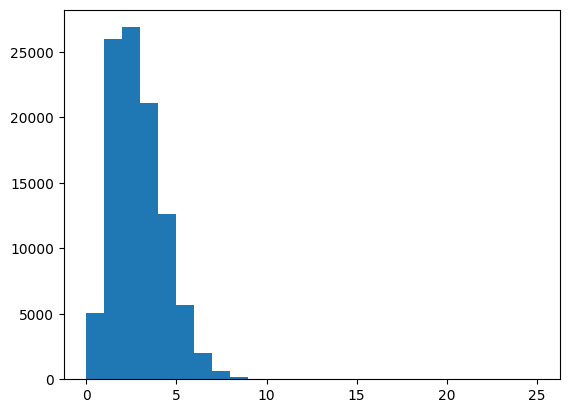

In [21]:
plt.hist(sampled_depths, bins=25, range=(0,25))

In [33]:
Tree = collections.namedtuple('Tree', ['left', 'right'], defaults=(None, None))
cached_depth_likelihoods = dict((i, p_s(i)) for i in range(0,100))

In [42]:
def tree_prior(t, d=0):
    if t == None:
        return 1-cached_depth_likelihoods[d]
    else:
        return cached_depth_likelihoods[d] * tree_prior(t.left, d+1) * tree_prior(t.right, d+1)

test_tree = Tree(left=Tree(), right=None)
tree_prior(test_tree)

#test_tree = Tree(left=Tree(), right=Tree())
#tree_prior(test_tree)

tree_prior(Tree())

0.26184375

In [58]:
data_mean = data['Culmen Length (mm)'].mean()
data_variance = data['Culmen Length (mm)'].var()
print(data_mean, data_variance)

38.79139072847682 7.093725386313466


In [ ]:
def node_elements(y, tree);
    
def nodes_likelihood(y, tree):
    node_elemens = node_elements(y, tree)
    s_i = 